/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


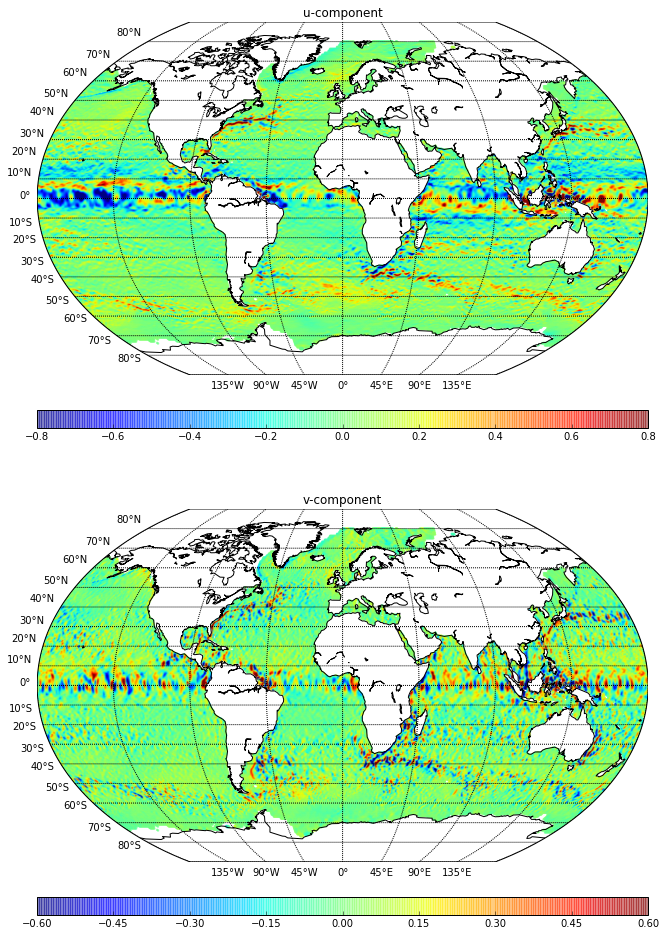

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import numpy as np
from numpy import linspace
from numpy import meshgrid

root = Dataset('oscar/oscar_vel8879.nc')
#print root.variables.keys()

sclats = root.variables['latitude'][:]
sclons = root.variables['longitude'][:]
u = root.variables['u'][0][0][:]
v = root.variables['v'][0][0][:]

#print sclats.shape, sclons.shape, u.shape

plt.figure(figsize=(15, 16))

plt.subplot(211)

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)

lonv, latv = np.meshgrid(sclons, sclats)
xi, yi = m(lonv, latv)

cs = m.scatter(xi, yi, marker='.', c=u, alpha=0.5, lw=0,vmin=-0.8, vmax=0.8)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("u-component")


plt.subplot(212)

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)

cs = m.scatter(xi, yi, marker='.', c=v, alpha=0.5, lw=0,vmin=-0.6, vmax=0.6)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("v-component")
plt.show()